In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-and-salaries-in-data-field-2024/jobs_in_data_2024.csv


In [2]:
df = pd.read_csv('/kaggle/input/jobs-and-salaries-in-data-field-2024/jobs_in_data_2024.csv')


### In this notebook, after analyzing each column, you will gain insights into the following areas:

1. Average Salary by Job Title
2. Average Salary by Job Category
3. Salary Trends Over Time
4. Hiring Trends Over Time by Job Category
5. Average Salary by Job Title and Experience Level
6. Average Salary by Job Category and Experience Level
7. Occurrences of Employment Types within Job Categories and Company Sizes
8. Average Salary for Each Company Location
9. Popularity of Work Setting Types across Job Categories
10. Salary Trends and Comparisons
11. Top-Paying Job Titles
12. Experience Level Analysis
13. Job Category Prevalence by Company Size
14. Job Category Prevalence by
15. Job Demand in High-Demand Regions

# Preliminary Data Exploration

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


All columns are non-null, which means there are no missing values to handle.

**work_year** is an integer, which is appropriate if it only contains the year. However, if there should be finer granularity (like months and days), then this might be a simplification of the data.

**salary** and **salary_in_usd** are integers, which is standard for salary data unless you're dealing with more precise figures that include decimals.

In [5]:
df.describe()

,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


The **work_year** seems to have a very low standard deviation, which suggests limited variability and possibly a short range of years in the dataset. This is normal if the dataset is supposed to only cover a few years.

The **salary** and **salary_in_usd** have a wide range with a substantial standard deviation, indicating significant variability in salary—which is typical given different job roles, seniority levels, and locations

The **maximum** value for salary and salary_in_usd is the same, which may indicate that the highest salary is paid in USD, or there might be a data entry issue if the salary should have been in another currency and then converted.

The **minimum** salaries are quite low, but without knowing the specific contexts (part-time, internship, or geographic factors), it's hard to say whether they are

In [6]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'work_setting', 'company_location', 'company_size', 'job_category'],
      dtype='object')

In [7]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
work_setting          object
company_location      object
company_size          object
job_category          object
dtype: object

In [8]:
df.size

170388

The **.size** output confirms the total number of elements in the DataFrame (number of rows multiplied by the number of columns).

In [9]:
df.shape

(14199, 12)

The **.shape** output confirms the dimensionality of the DataFrame (14199 rows and 12 columns)

In [10]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64

In [11]:
df.duplicated().any()

True

In [12]:
 df.duplicated(keep='first').sum()

5493

In [13]:
# To check for duplicate values in each column of the DataFrame, we can use the following approach.
# We will create a dictionary that will hold the column names as keys and the number of unique values as values.

unique_values = {col: df[col].nunique() for col in df.columns}
total_rows = len(df)
duplicate_values = {col: total_rows - count for col, count in unique_values.items() if total_rows - count > 0}

duplicate_values


{'work_year': 14194,
 'experience_level': 14195,
 'employment_type': 14195,
 'job_title': 14050,
 'salary': 11970,
 'salary_currency': 14187,
 'salary_in_usd': 11621,
 'employee_residence': 14113,
 'work_setting': 14196,
 'company_location': 14125,
 'company_size': 14196,
 'job_category': 14189}

# Analyzing the "experience_level" Column


In [14]:
#unique values in the column 'experience_level'
df['experience_level'].unique()

array(['Entry-level', 'Executive', 'Senior', 'Mid-level'], dtype=object)

In [15]:
# Count the occurrences of each value in the 'experience_level' column
df['experience_level'].value_counts()


experience_level
Senior         9381
Mid-level      3339
Entry-level    1063
Executive       416
Name: count, dtype: int64

In [16]:

# Create a DataFrame with the value counts of experience_level
experience_counts = df['experience_level'].value_counts().reset_index()
experience_counts.columns = ['Experience Level', 'Count']

# Create an interactive bar plot
fig = px.bar(experience_counts, x='Experience Level', y='Count', 
             title='Distribution of Experience Levels',
             labels={'Experience Level': 'Experience Level', 'Count': 'Count'})
fig.show()


# Analyzing the "employment_type" Column


In [17]:
#findout different types of emplyment_type
df['employment_type'].unique()

array(['Freelance', 'Full-time', 'Contract', 'Part-time'], dtype=object)

In [18]:
# Count the occurrences of each value in the 'experience_level' column
df['employment_type'].value_counts()


employment_type
Full-time    14139
Contract        26
Part-time       22
Freelance       12
Name: count, dtype: int64

In [19]:

# Create a DataFrame with the value counts of experience_level
experience_counts = df['employment_type'].value_counts().reset_index()
experience_counts.columns = ['Employment Type', 'Count']

# Create an interactive bar plot
fig = px.bar(experience_counts, x='Employment Type', y='Count', 
             title='Distribution of Employment Types',
             labels={'Employment Types': 'Employment Types', 'Count': 'Count'})
fig.show()


# Analyzing the "job_title" Column


In [20]:
#findout different types of job_title
df['job_title'].unique()

array(['Applied Data Scientist', 'Business Intelligence',
       'Data Architect', 'Data Science', 'Insight Analyst',
       'Data Engineer', 'Research Scientist',
       'Business Intelligence Analyst', 'Analytics Engineer',
       'Data Scientist', 'Research Engineer', 'BI Developer',
       'Data Analyst', 'Business Intelligence Engineer',
       'Data Quality Engineer', 'Machine Learning Engineer',
       'Cloud Database Engineer', 'Head of Data', 'BI Analyst',
       'Data Manager', 'Computational Biologist',
       'Data Integration Specialist', 'Data Science Manager',
       'AI Engineer', 'Applied Scientist', 'BI Data Analyst',
       'AI Research Scientist', 'MLOps Engineer', 'Research Analyst',
       'Admin & Data Analyst', 'Business Intelligence Manager',
       'Data Developer', 'Prompt Engineer', 'Data Specialist',
       'Data Integration Engineer', 'Data Science Analyst',
       'Data Analytics Associate', 'Data Reporting Analyst',
       'Business Intelligence Develope

As we observe numerous job titles, let's examine the occurrences of the most frequent job titles.

In [21]:
df['job_title'].value_counts()

job_title
Data Engineer                    3059
Data Scientist                   2910
Data Analyst                     2120
Machine Learning Engineer        1488
Research Scientist                454
                                 ... 
Data Analytics Associate            1
Analytics Engineering Manager       1
Sales Data Analyst                  1
AWS Data Architect                  1
Consultant Data Engineer            1
Name: count, Length: 149, dtype: int64

The top five job titles have the highest occurrences.

In [22]:

# Create a DataFrame with the value counts of experience_level
experience_counts = df['job_title'].value_counts().reset_index().head(5)
experience_counts.columns = ['Job Title', 'Count']

# Create an interactive bar plot
fig = px.bar(experience_counts, x='Job Title', y='Count', 
             title='Distribution of Job Title',
             labels={'Job Title': 'Job Title', 'Count': 'Count'})
fig.show()


# Analyzing the "employee_residence" Column


In [23]:
#findout different types of emplyment_type
df['employee_residence'].unique()

array(['United Kingdom', 'United States', 'Canada', 'Lithuania', 'Poland',
       'France', 'Germany', 'Saudi Arabia', 'India', 'Australia',
       'United Arab Emirates', 'Ukraine', 'Netherlands', 'Egypt',
       'Austria', 'Spain', 'Philippines', 'Finland', 'Türkiye',
       'Switzerland', 'Oman', 'New Zealand', 'Mexico', 'Portugal',
       'Bosnia and Herzegovina', 'Brazil', 'Argentina', 'Latvia',
       'South Africa', 'Italy', 'Ireland', 'Estonia', 'Malta', 'Croatia',
       'Lebanon', 'Romania', 'Hungary', 'Viet Nam', 'Nigeria', 'Czechia',
       'Pakistan', 'Uganda', 'Colombia', 'Slovenia', 'Greece',
       'Mauritius', 'Armenia', 'Thailand', 'Korea, Republic of', 'Qatar',
       'Russian Federation', 'Kenya', 'Tunisia', 'Ghana', 'Belgium',
       'Andorra', 'Ecuador', 'Peru', 'Moldova, Republic of', 'Uzbekistan',
       'Georgia', 'Central African Republic', 'Singapore', 'Sweden',
       'Kuwait', 'Cyprus', 'Iran, Islamic Republic of', 'American Samoa',
       'China', 'Costa R

In [24]:
df['employee_residence'].value_counts()

employee_residence
United States     12418
United Kingdom      616
Canada              371
Spain               131
Germany              90
                  ...  
Andorra               1
Uganda                1
Oman                  1
Qatar                 1
Luxembourg            1
Name: count, Length: 86, dtype: int64

In [25]:

# Create a DataFrame with the value counts of experience_level
experience_counts = df['employee_residence'].value_counts().reset_index().head(5)
experience_counts.columns = ['Employee Residence', 'Count']

# Create an interactive bar plot
fig = px.bar(experience_counts, x='Employee Residence', y='Count', 
             title='Distribution of Employee Residence',
             labels={'Employee Residence ':'Employee Residence', 'Count': 'Count'})
fig.show()


# Analyzing the "work_setting" Column


In [26]:
df['work_setting'].unique()

array(['Remote', 'In-person', 'Hybrid'], dtype=object)

In [27]:
df['work_setting'].value_counts()

work_setting
In-person    9413
Remote       4573
Hybrid        213
Name: count, dtype: int64

In [28]:

# Create a DataFrame with the value counts of experience_level
experience_counts = df['work_setting'].value_counts().reset_index()
experience_counts.columns = ['Work Setting', 'Count']

# Create an interactive bar plot
fig = px.bar(experience_counts, x='Work Setting', y='Count', 
             title='Distribution of Work Setting',
             labels={'Work Setting':'Work Setting', 'Count': 'Count'})
fig.show()


# Analyzing the "company_location" Column


In [29]:
df['company_location'].unique()

array(['United Kingdom', 'United States', 'Canada', 'Lithuania', 'Poland',
       'France', 'Germany', 'Saudi Arabia', 'Australia',
       'United Arab Emirates', 'Ukraine', 'Netherlands', 'Egypt',
       'Austria', 'Spain', 'Philippines', 'Finland', 'Türkiye',
       'Switzerland', 'Oman', 'New Zealand', 'Mexico', 'Portugal',
       'Bosnia and Herzegovina', 'Brazil', 'Argentina', 'Latvia',
       'South Africa', 'Italy', 'American Samoa', 'Ireland', 'Estonia',
       'India', 'Malta', 'Hungary', 'Lebanon', 'Romania', 'Viet Nam',
       'Nigeria', 'Luxembourg', 'Gibraltar', 'Colombia', 'Slovenia',
       'Greece', 'Mauritius', 'Russian Federation', 'Korea, Republic of',
       'Czechia', 'Qatar', 'Kenya', 'Denmark', 'Ghana', 'Sweden',
       'Andorra', 'Ecuador', 'Israel', 'Japan',
       'Central African Republic', 'Singapore', 'Croatia', 'Armenia',
       'Pakistan', 'Iran, Islamic Republic of', 'Bahamas', 'Puerto Rico',
       'Thailand', 'Belgium', 'Indonesia', 'Malaysia', 'Hondur

In [30]:
df['company_location'].value_counts()

company_location
United States           12465
United Kingdom            623
Canada                    373
Spain                     127
Germany                    96
                        ...  
Andorra                     1
Qatar                       1
Mauritius                   1
Gibraltar                   1
Moldova, Republic of        1
Name: count, Length: 74, dtype: int64

In [31]:

# Create a DataFrame with the value counts of experience_level
experience_counts = df['company_location'].value_counts().reset_index().head(5)
experience_counts.columns = ['Company Location', 'Count']

# Create an interactive bar plot
fig = px.bar(experience_counts, x='Company Location', y='Count', 
             title='Distribution of Company Location',
             labels={'Company Location ':'Company Location', 'Count': 'Count'})
fig.show()


# Analyzing the "company_size" Column


In [32]:
df['company_size'].unique()

array(['M', 'S', 'L'], dtype=object)

In [33]:
df['company_size'].value_counts()

company_size
M    13112
L      919
S      168
Name: count, dtype: int64

In [34]:

# Create a DataFrame with the value counts of experience_level
experience_counts = df['company_size'].value_counts().reset_index().head(5)
experience_counts.columns = ['Company Size', 'Count']

# Create an interactive bar plot
fig = px.bar(experience_counts, x='Company Size', y='Count', 
             title='Distribution of Company Size',
             labels={'Company Size ':'Company Size', 'Count': 'Count'})
fig.show()


# Analyzing the "job_category" Column


In [35]:
df['job_category'].unique()

array(['Data Science and Research', 'BI and Visualization',
       'Data Architecture and Modeling', 'Data Analysis',
       'Data Engineering', 'Leadership and Management',
       'Data Quality and Operations', 'Machine Learning and AI',
       'Cloud and Database', 'Data Management and Strategy'], dtype=object)

In [36]:
df['job_category'].value_counts()

job_category
Data Science and Research         4675
Data Engineering                  3157
Data Analysis                     2204
Machine Learning and AI           2148
Leadership and Management          791
BI and Visualization               600
Data Architecture and Modeling     419
Data Management and Strategy       115
Data Quality and Operations         79
Cloud and Database                  11
Name: count, dtype: int64

In [37]:

# Create a DataFrame with the value counts of experience_level
experience_counts = df['job_category'].value_counts().reset_index().head(5)
experience_counts.columns = ['job Category', 'Count']

# Create an interactive bar plot
fig = px.bar(experience_counts, x='job Category', y='Count', 
             title='Distribution of Job Category',
             labels={'Job Category ':'Job Category', 'Count': 'Count'})
fig.show()


In [38]:
df['salary'].value_counts().head(5)

salary
150000    307
100000    296
130000    272
160000    248
120000    237
Name: count, dtype: int64

In [39]:
df['salary_in_usd'].value_counts().head(5)

salary_in_usd
150000    303
100000    270
130000    267
160000    246
140000    224
Name: count, dtype: int64

# Average Salary by Job Title

In [40]:

# Calculate the average salary by job title
avg_salary_by_title = df.groupby('job_title')['salary_in_usd'].mean().reset_index().head(5)

# Sort the data in ascending order of average salary
avg_salary_by_title_sorted = avg_salary_by_title.sort_values('salary_in_usd', ascending=True)

# Create a bar chart with sorted data
fig = px.bar(avg_salary_by_title_sorted, x='salary_in_usd', y='job_title',
             title='Average Salary by Job Title',
             labels={'salary_in_usd': 'Average Salary in USD', 'job_title': 'Job Title'},
             orientation='h')

# Show the figure
fig.show()


# Average Salary by Job Category

In [41]:

# Calculate the average salary by job title
avg_salary_by_title = df.groupby('job_category')['salary_in_usd'].mean().reset_index().head(5)

# Sort the data in ascending order of average salary
avg_salary_by_title_sorted = avg_salary_by_title.sort_values('salary_in_usd', ascending=True)

# Create a bar chart with sorted data
fig = px.bar(avg_salary_by_title_sorted, x='salary_in_usd', y='job_category',
             title='Average Salary by Job category',
             labels={'salary_in_usd': 'Average Salary in USD', 'job_title': 'Job Category'},
             orientation='h')

# Show the figure
fig.show()


## Salary Trends Over Time

In [42]:

# Calculate the average or median salary for each work year
average_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Create a line chart for salary trends over time
fig = px.line(average_salary_per_year, x='work_year', y='salary_in_usd', 
              title='Average Salary Trend Over Time',
              labels={'work_year': 'Work Year', 'salary_in_usd': 'Average Salary in USD'})

# Show the figure
fig.show()


## Hiring Trends Over Time by Job Category


In [43]:
# Count the number of positions per year for each job category
job_category_trends = df.groupby(['work_year', 'job_category']).size().reset_index(name='count')

# Create an area chart for hiring trends over time by job category
fig = px.area(job_category_trends, x='work_year', y='count', color='job_category',
              title='Hiring Trends Over Time by Job Category',
              labels={'work_year': 'Work Year', 'count': 'Number of Positions', 'job_category': 'Job Category'})

# Show the figure
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Average Salary by Job Title and Experience Level

In [44]:

# Calculate the average salary for each job title and experience level
salary_by_category_experience = df.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean().reset_index().head(30)

# Create a bar chart to show this relationship
fig_salary = px.bar(salary_by_category_experience, 
                    x='job_title', 
                    y='salary_in_usd', 
                    color='experience_level', 
                    title='Average Salary by Job Category and Experience Level',
                    labels={'salary_in_usd': 'Average Salary in USD', 'job_title': 'job_title'})

fig_salary.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Average Salary by Job Category and Experience Level

In [45]:

# Calculate the average salary for each job category and experience level
salary_by_category_experience = df.groupby(['job_category', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Create a bar chart to show this relationship
fig_salary = px.bar(salary_by_category_experience, 
                    x='job_category', 
                    y='salary_in_usd', 
                    color='experience_level', 
                    title='Average Salary by Job Category and Experience Level',
                    labels={'salary_in_usd': 'Average Salary in USD', 'job_category': 'Job Category'})

fig_salary.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# Occurrences of employment types within job categories and company sizes

In [46]:
# Count occurrences of employment types within job categories and company sizes
employment_prevalence = df.groupby(['job_category', 'company_size', 'employment_type']).size().reset_index(name='count')

# Create a stacked bar chart or area chart for prevalence analysis
fig_prevalence = px.bar(employment_prevalence, x='job_category', y='count', color='employment_type', facet_col='company_size',
                        title='Prevalence of Employment Types Across Job Categories and Company Sizes',
                        labels={'count': 'Number of Positions', 'job_category': 'Job Category', 'company_size': 'Company Size'})

fig_prevalence.show()


## Average salary for each company location


In [47]:
# Calculate the average salary for each company location
avg_salary_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Create a bar chart for average salary by company location
fig_location = px.bar(avg_salary_by_location, x='company_location', y='salary_in_usd',
                      title='Average Salary by Company Location',
                      labels={'company_location': 'Company Location', 'salary_in_usd': 'Average Salary in USD'},
                      color='salary_in_usd')

fig_location.show()


## Average Salary by Job Category and Experience Level

In [48]:
# Group by job category and experience level, then calculate the average salary
avg_salary_by_category_and_level = df.groupby(['job_category', 'experience_level'])['salary_in_usd'].mean().reset_index()

# Create a bar chart
fig = px.bar(avg_salary_by_category_and_level, 
             x='job_category', 
             y='salary_in_usd', 
             color='experience_level', 
             barmode='group',
             title='Average Salary by Job Category and Experience Level')

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Popularity of Work Setting Types Across Job Categories

In [49]:
# Count the occurrences of each work setting within each job category
work_setting_counts = df.groupby(['job_category', 'work_setting']).size().reset_index(name='count')

# Create a bar chart
fig = px.bar(work_setting_counts, 
             x='job_category', 
             y='count', 
             color='work_setting', 
             title='Popularity of Work Setting Types Across Job Categories')

fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Salary Trends and Comparisons:

In [50]:
# Calculate mean salary
mean_salary = df['salary_in_usd'].mean()

# Calculate median salary
median_salary = df['salary_in_usd'].median()

print("Mean Salary in USD:", mean_salary)
print("Median Salary in USD:", median_salary)


Mean Salary in USD: 149472.04944010143
Median Salary in USD: 142000.0


This shows that the average salary across all records is around 149,472.05, but this can be skewed by particularly high or low salaries (which is often the case in salary data). The median salary, being 142,000.00, represents the middle salary value when all are sorted in order. It means that half of the people earn less than 142,000.00 and the other half earn more.

The fact that the median is lower than the mean suggests that the distribution of salaries is right-skewed, meaning there are a number of salaries on the higher end that are pulling the average up. 

## Top-paying job titles


In [51]:
# Top-paying job titles 
top_titles = df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)

top_titles.head()


job_title
Analytics Engineering Manager     399880.0
Data Science Tech Lead            375000.0
Head of Machine Learning          351500.0
Managing Director Data Science    280000.0
AWS Data Architect                258000.0
Name: salary_in_usd, dtype: float64

## Top-paying job categories

In [52]:
top_categories = df.groupby('job_category')['salary_in_usd'].median().sort_values(ascending=False)

top_categories.head()

job_category
Machine Learning and AI           180000.0
Data Science and Research         156400.0
Data Architecture and Modeling    150000.0
Cloud and Database                146125.0
Data Engineering                  140000.0
Name: salary_in_usd, dtype: float64

# Experience Level Analysis

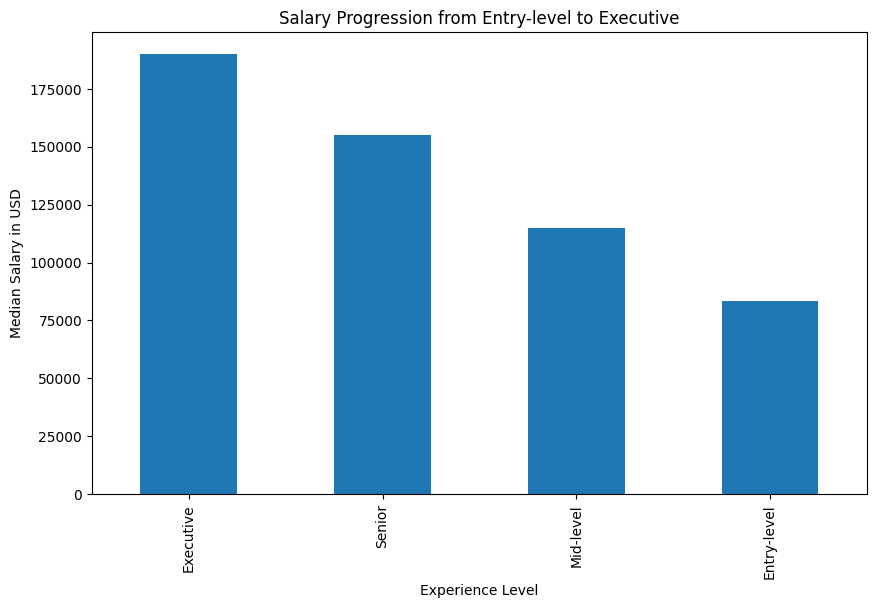

In [53]:
# 2. Checking salary progression from entry-level to executive
# Group by experience level and calculate median salary
salary_progression = df.groupby('experience_level')['salary_in_usd'].median().reindex(['Executive', 'Senior', 'Mid-level', 'Entry-level'])

plt.figure(figsize=(10, 6))
salary_progression.plot(kind='bar')
plt.title('Salary Progression from Entry-level to Executive')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary in USD')
plt.show()

## Job Category Prevalence by Company Size

In [54]:
# Count the number of occurrences for each job category within different company sizes
category_by_company_size = df.groupby(['job_category', 'company_size']).size().reset_index(name='count')

# Create a heatmap or bar chart to show this relationship
fig_company_size = px.bar(category_by_company_size, 
                          x='job_category', 
                          y='count', 
                          color='company_size', 
                          title='Job Category Prevalence by Company Size',
                          labels={'count': 'Number of Positions', 'job_category': 'Job Category'})

fig_company_size.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Job Category Prevalence by Region

In [55]:
# Count the number of occurrences for each job category within different regions (employee residences)
category_by_region = df.groupby(['job_category', 'employee_residence']).size().reset_index(name='count')

# Create a heatmap or bar chart to visualize
fig_region = px.bar(category_by_region, 
                    x='job_category', 
                    y='count', 
                    color='employee_residence', 
                    title='Job Category Prevalence by Region',
                    labels={'count': 'Number of Positions', 'job_category': 'Job Category'})

fig_region.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [56]:
# Calculate the average salary and count job occurrences over time for each job category
salary_trends = df.groupby(['work_year', 'job_category'])['salary_in_usd'].mean().reset_index(name='average_salary')
hiring_trends = df.groupby(['work_year', 'job_category']).size().reset_index(name='job_count')

# Merge the two datasets on work year and job category
trends_combined = pd.merge(salary_trends, hiring_trends, on=['work_year', 'job_category'])

# Use Plotly to create a combined line chart to show both trends
fig_trends_combined = px.line(trends_combined, x='work_year', 
                              title='Comparative Analysis of Hiring and Salary Trends by Job Category')

# Add salary trend lines
fig_trends_combined.add_traces(px.line(trends_combined, x='work_year', y='average_salary', color='job_category').data)

# Add hiring trend lines
fig_trends_combined.add_traces(px.line(trends_combined, x='work_year', y='job_count', color='job_category').data)

fig_trends_combined.update_layout(yaxis_title='Count / Average Salary',
                                  legend_title='Job Category')

fig_trends_combined.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



## Job Demand in High-Demand Regions

In [57]:

# Group by employee residence to count the number of job occurrences
demand_by_region = df.groupby('employee_residence').size().reset_index(name='count')

# Filter to keep only regions with high job demand (you can define 'high' based on your data, for example, top 10)
threshold = demand_by_region['count'].nlargest(10).min()  # Adjust the threshold as needed
high_demand_regions = demand_by_region[demand_by_region['count'] >= threshold]

# Create a bar chart to show the number of job listings in high-demand regions
fig_demand_region = px.bar(high_demand_regions, x='employee_residence', y='count',
                           title='Job Demand in High-Demand Regions',
                           labels={'employee_residence': 'Region', 'count': 'Number of Job Listings'})

fig_demand_region.show()
